<h2 style='color:#E9CA30;font-size:40px'><center> Lemonade </center></h2> 

<img src="lemonade.png" width="500" height="200">

<h3 style='color:#E9CA30; font-size:20px'>1. Import Libraries </h3>

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import sklearn

<h3 style='color:#E9CA30; font-size:20px'>2. Load data </h3>

In [35]:
data = pd.read_excel('lemonade.xlsx')
data.head(3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Revenue
0,2017-01-01,Sunday,27.0,2.00,15,0.3,10,3.0
1,2017-01-02,Monday,28.9,1.33,15,0.3,13,3.9
2,2017-01-03,Tuesday,34.5,1.33,27,0.3,15,4.5


<h3 style='color:#E9CA30; font-size:20px'>3. Data Analysis </h3>

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Day          365 non-null    object        
 2   Temperature  365 non-null    float64       
 3   Rainfall     365 non-null    float64       
 4   Flyers       365 non-null    int64         
 5   Price        365 non-null    float64       
 6   Sales        365 non-null    int64         
 7   Revenue      365 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 22.9+ KB


In [38]:
data.rename(columns={
    'Date':'date',
    'Day': 'day',
    'Temperature': 'temperature',
    'Rainfall': 'rain_fall',
    'Flyers': 'flyers',
    'Price': 'price',
    'Sales': 'sales',
    'Revenue':'revenue'
}, inplace=True)

In [39]:
data.columns

Index(['date', 'day', 'temperature', 'rain_fall', 'flyers', 'price', 'sales',
       'revenue'],
      dtype='object')

In [40]:
data.shape

(365, 8)

In [41]:
data.isnull().any()

date           False
day            False
temperature    False
rain_fall      False
flyers         False
price          False
sales          False
revenue        False
dtype: bool

In [42]:
data.notnull().any()

date           True
day            True
temperature    True
rain_fall      True
flyers         True
price          True
sales          True
revenue        True
dtype: bool

In [43]:
data.dtypes

date           datetime64[ns]
day                    object
temperature           float64
rain_fall             float64
flyers                  int64
price                 float64
sales                   int64
revenue               float64
dtype: object

<h3 style='color:#E9CA30; font-size:20px'>4. Exploratory Data Analysis </h3>

In [57]:
print("Rows: ", data.shape[0])
print('*' * 50)
print("Columns: ", data.shape[1])

Rows:  365
**************************************************
Columns:  8


In [46]:
data.describe()

,temperature,rain_fall,flyers,price,sales,revenue
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,60.731233,0.826603,40.284932,0.333973,25.323288,8.722466
std,16.196266,0.273171,13.178651,0.075206,6.893589,4.017536
min,15.100000,0.470000,9.000000,0.300000,7.000000,2.100000
25%,49.700000,0.650000,31.000000,0.300000,20.000000,6.000000
50%,61.100000,0.740000,39.000000,0.300000,25.000000,7.500000
75%,71.300000,0.910000,49.000000,0.300000,30.000000,9.300000
max,102.900000,2.500000,80.000000,0.500000,43.000000,21.500000


In [52]:
#check rail fall column has the relationship or not?
print('*' * 50)
print(data['rain_fall'].corr(data['sales']))
print('*' * 50)

**************************************************
-0.909213932410103
**************************************************


In [53]:
#Correlation Matrix
correlations = data.corr(method='pearson')

Text(0.5, 1.0, 'Correlations Matrix in each columns')

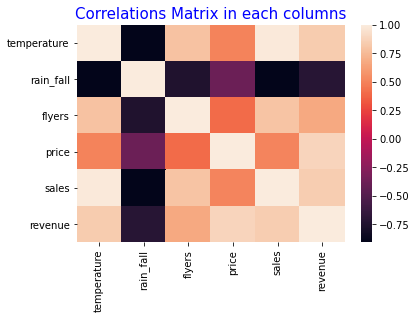

In [54]:
sns.heatmap(correlations, 
           xticklabels=correlations.columns.values,
           yticklabels=correlations.columns.values)
plt.title('Correlations Matrix in each columns', color='b', fontsize='15')

<h3 style='color:#E9CA30; font-size:20px'>5. Data Analysis & Visualization & Insight</h3>

In [130]:
def draw_line_chart(weight, height, title, xlabel, ylabel, legend):
    
    plt.figure(figsize=(20,7))
    plt.xticks(rotation='45')
    plt.plot(weight, height)
    plt.title(title, color='green', fontsize='23')
    plt.xlabel(xlabel, color='r', fontsize='18')
    plt.ylabel(ylabel, color='r', fontsize='18')
    plt.legend(legend)
    plt.show()

def draw_bar_chart(weight, height, title, xlabel, ylabel, legend):
    plt.figure(figsize=(15,7))
    plt.xticks(rotation='45')
    plt.bar(weight, height, color='green')
    plt.title(title, color='green', fontsize='23')
    plt.xlabel(xlabel, color='r', fontsize='18')
    plt.ylabel(ylabel, color='r', fontsize='18')
    plt.legend(legend)
    plt.show()

<h4 style='color:red; font-size:18px'> Sales</h4>

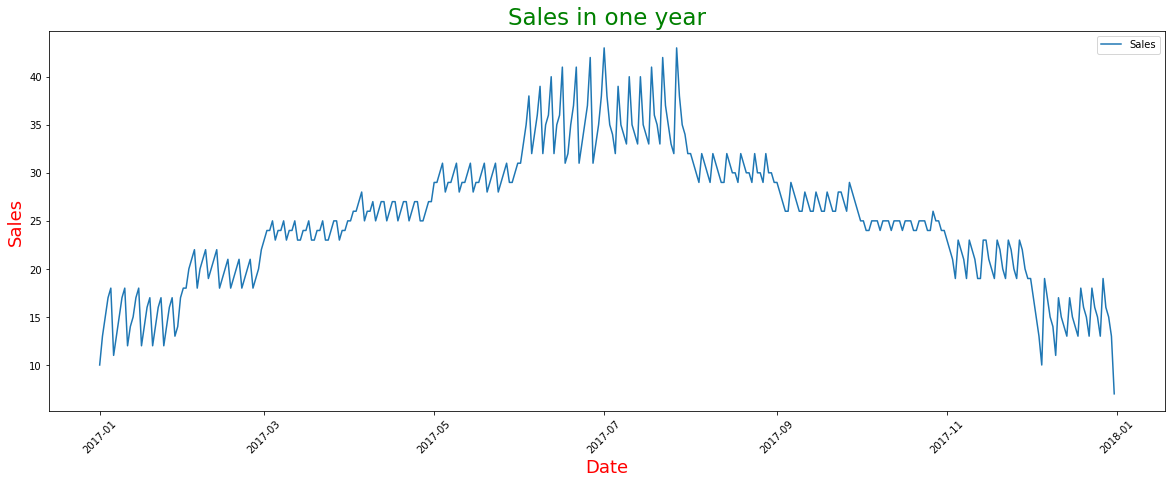

In [72]:
sale_dimension = data['sales']
date_dimension = data['date']

draw_line_chart(date_dimension, sale_dimension, "Sales in one year", "Date", 'Sales', ['Sales'])

<h4 style='color:red; font-size:18px'> Sales and Temperature</h4>

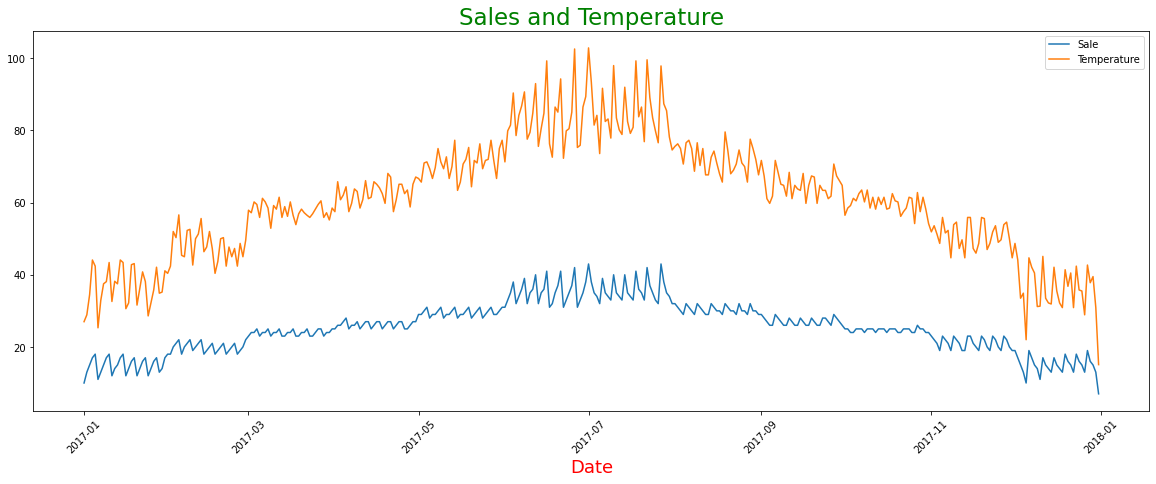

In [74]:
temperature_sale_dimension = data[['sales', 'temperature']]

draw_line_chart(date_dimension, temperature_sale_dimension, "Sales and Temperature", 'Date', '', ['Sale', 'Temperature'])


<h4 style='color:red; font-size:18px'>  Revenue by Day in one year</h4>

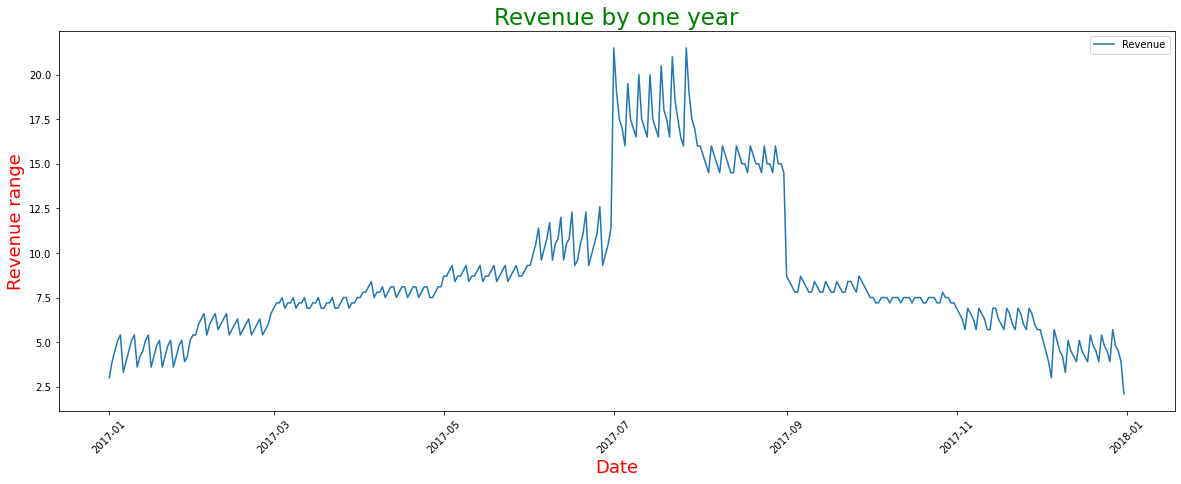

In [86]:
revenue_dimension = data['revenue']
draw_line_chart(date_dimension, revenue_dimension, 'Revenue by one year', 'Date', 'Revenue range', ['Revenue'])

<h4 style='color:red; font-size:18px'>  Average Revenue by Weekday</h4>

In [125]:
avg_revenue = data.groupby('day').mean()
avg_revenue['revenue']

day
Friday       8.630769
Monday       8.788462
Saturday     8.803846
Sunday       8.566038
Thursday     8.863462
Tuesday      8.675000
Wednesday    8.732692
Name: revenue, dtype: float64

<Figure size 1080x360 with 0 Axes>

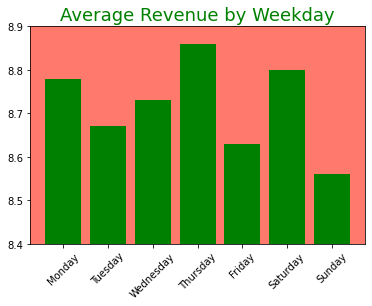

<Figure size 1080x360 with 0 Axes>

In [158]:
day_revenue = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
avg_revenue = [8.78, 8.67, 8.73, 8.86, 8.63, 8.80, 8.56]

#Scale axis=1 values
ax = plt.gca()
ax.set_ylim([8.40, 8.90])

#Set background color
ax.set_facecolor('xkcd:salmon')
plt.xticks(rotation='45')
plt.title("Average Revenue by Weekday", color='green', fontsize=18)



plt.bar(day_revenue, avg_revenue, color='green')
plt.figure(figsize=(15,5))




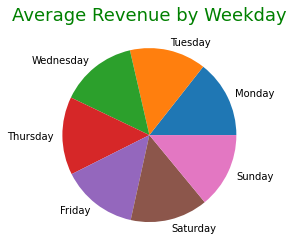

<Figure size 1440x720 with 0 Axes>

In [174]:
plt.pie(avg_revenue, labels=day_revenue)
plt.title("Average Revenue by Weekday", color='green', fontsize=18)
plt.figure(figsize=(20,10))
#plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'], loc='lower right')
plt.show()

<h4 style='color:red; font-size:18px'>  Sale by Flyers</h4>

<Figure size 1368x360 with 0 Axes>

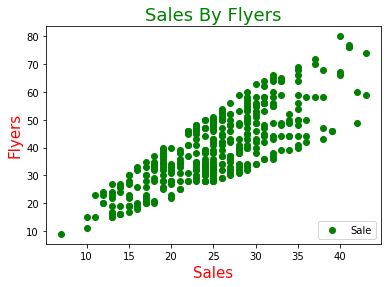

<Figure size 1368x360 with 0 Axes>

In [193]:
sale_by_flyers = data.sort_values(by=['date', 'sales', 'flyers'])
sales_attribute = sale_by_flyers['sales']
flyers_attribute = sale_by_flyers['flyers']

plt.scatter(sales_attribute, flyers_attribute, color='green')

plt.legend(['Sale'], loc='lower right')
plt.title('Sales By Flyers', color='green', fontsize=18)
plt.xlabel('Sales',color='red', fontsize=15)
plt.ylabel('Flyers',color='red', fontsize=15)
plt.figure(figsize=(19,5))

<h4 style='color:red; font-size:18px'>  Sale by Rainfall</h4>

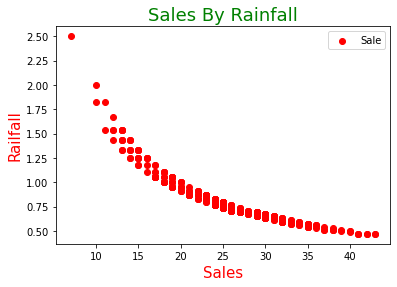

In [201]:
sale_by_rainfall = data.sort_values(by=['date', 'sales', 'rain_fall'])
sale_feature = sale_by_rainfall['sales']
railfall_feature = sale_by_rainfall['rain_fall']

plt.scatter(sale_feature, railfall_feature, color='r')
plt.title('Sales By Rainfall', color='green', fontsize=18)
plt.xlabel('Sales', color='red', fontsize=15)
plt.ylabel('Railfall', color='red', fontsize=15)
plt.legend(['Sale'])

<h4 style='color:red; font-size:18px'>  Sale by Temperature</h4>

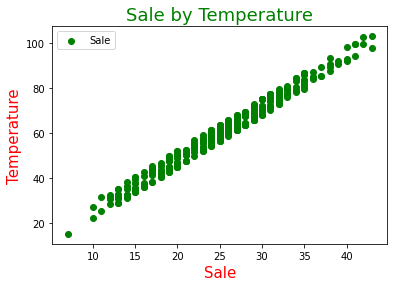

In [212]:
sale_by_temperature = data.sort_values(by=['date', 'sales', 'temperature'])
sale_field = sale_by_temperature['sales']
temperature_field = sale_by_temperature['temperature']

plt.scatter(sale_field, temperature_field, color='g')
plt.title('Sale by Temperature', color='green', fontsize=18)
plt.xlabel('Sale', color='r', fontsize=15)
plt.ylabel('Temperature', color='r', fontsize=15)
plt.legend(['Sale'])